# Wine classification with Ordinary Least Squares (OLS)

The goal of this task is to classify kinds of wine based on the chemical analysis data in [Wine dataset](https://archive.ics.uci.edu/ml/datasets/Wine) using ordinary least squares (OLS) method. 

## 1. Load the data

We start out loading all required packages:

In [1]:
import os

import numpy as np
import pandas as pd

%pylab inline
%config InlineBackend.figure_format='svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_name = 'wine.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = ['Class','Alcohol', 'Malic acid','Ash', 'Alcalinity of ash', 'Magnesium',
               'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, index_col=0)
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, names=column_names)
    df.to_csv(file_name)
    print('Done.')

Loading data from local file `wine.csv`...


Let us inspect the data:

In [3]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 2. Remove class 3 and assign class labels

There are three classes in the original dataset with labels 1, 2 and 3. We discard class 3 and relabel the remaining two classes as 1 and -1.

In [4]:
df = df[df['Class']!=3].copy()
df['Class'] = df['Class'].replace([1,2],[1,-1])

## 3. Train-test split 

In [5]:
def  train_test_split(df, training_data_fraction, shuffle=True):
    '''
    Split all available data into a training and test data set.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame of available data.
    training_data_fraction : float
        The fraction of the data that should be used for training.
        E.g., `training_data_fraction=0.6` means 60%.
    shuffle : bool , optional
        If True, randomly reshuffles the data before the split.
    '''
    
    if shuffle is True:
        df_ = df.sample(frac=1).reset_index(drop=True)
    else:
        df_= df
    
    train_df = df_.iloc[:round(training_data_fraction*len(df_)),:]
    test_df = df_.iloc[round(training_data_fraction*len(df_)):,:]
    
    return df_, train_df, test_df

We will first work with a two-dimensional projection of the data onto columns “Alcohol” and “Proline”.

In [6]:
training_data_fraction = .8

df, train_df, test_df =  train_test_split(df, training_data_fraction)

# convert DataFrame entries to Numpy arrays
# `X, Y`: all data
# `train_X, train_Y`: training data
# `test_X, test_Y`: training data

X = df[['Alcohol', 'Proline']].to_numpy()
Y = df['Class'].to_numpy()

train_X = train_df[['Alcohol', 'Proline']].to_numpy()
train_Y = train_df['Class'].to_numpy()

test_X = test_df[['Alcohol', 'Proline']].to_numpy()
test_Y = test_df['Class'].to_numpy()

print('Training data split as follows:')
print(f'  Training data samples: {len(train_df)}')
print(f'      Test data samples: {len(test_df)}')

Training data split as follows:
  Training data samples: 104
      Test data samples: 26


## 4. Plot the data

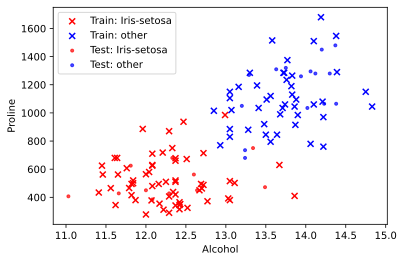

In [7]:
fig, ax = plt.subplots()

train_X_minus1 = train_X[train_Y == -1]
plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa')

train_X_plus1 = train_X[train_Y == +1]
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other')

test_X_minus1 = test_X[test_Y == -1]
test_X_plus1 = test_X[test_Y == +1]
plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.legend()

## 5. Define a binary classification class with OLS

We will define the hypothesis $h_{w,b}(x)=\text{sign}(w\cdot x+b)$ as a
Python class to keep track of the internal weight vector $w$ and bias term
$b$. 

We add OLS() training method to our classifier, which **analytically** solves OLS problem with intercept.

In [8]:
class LinearBinaryClassification:

    def __init__(self, w, b):
        self._w = w
        self._b = b
        
    def h(self, x):
        # Numpy's `where` function provides a fast substitution
        return np.where(x @ self._w + self._b >= 0.0, 1, -1)
    
    def OLS(self, X, Y):
        X = np.hstack([X,np.ones((X.shape[0],1))])
        
        ols_sol = np.linalg.inv(X.T@X)@X.T@Y
        
        self._w = ols_sol[:-1]
        self._b = ols_sol[-1]
        
        return self._w, self._b

## 6. Train OLS on the training data and plot the results

In [9]:
w = np.array([0, 0])
b = 0
model = LinearBinaryClassification(w, b)
model.OLS(train_X,train_Y)

(array([0.52763916, 0.00146757]), -8.071529084961064)

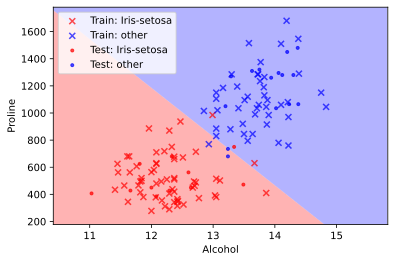

In [10]:
fig, ax = plt.subplots()

# compute how large the mesh for the contour plot shall be (with +/- 1 as
# safety bleed)
x1_min = train_X[:, 0].min() - 1
x1_max = train_X[:, 0].max() + 1
x2_min = train_X[:, 1].min() - 100
x2_max = train_X[:, 1].max() + 100

# compute grid for contour plot
x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .5))
# meshgrid produces two arrays of the size `len(np.arange(x1_min, x1_max,
# .01))` times `len(np.arange(x2_min, x2_max, .01))` so that computations can
# be easily be vectorized.
X_list = np.dstack([x1_list, x2_list])
# present X_list to our hypothesis for evaluation
h_list = model.h(X_list)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
plt.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('Alcohol')
plt.xlim(x1_min, x1_max)
plt.ylabel('Proline')
plt.ylim(x2_min, x2_max)
plt.legend()

## 7. Count the number of errors in the classification

In [11]:
N = len(train_X)
train_errors = np.sum(model.h(train_X) != train_Y)
print(f'Sample size: {N}')
print(f'Number of correct classifications: {N - train_errors}')
print(f'Number of incorrect classifications: {train_errors}')
print(f'Accuracy: {round((N - train_errors)/N*100,2)}%')

Sample size: 104
Number of correct classifications: 101
Number of incorrect classifications: 3
Accuracy: 97.12%


In [12]:
M = len(test_X)
test_errors = np.sum(model.h(test_X) != test_Y)
print(f'Sample size: {M}')
print(f'Number of correct classifications: {M - test_errors}')
print(f'Number of incorrect classifications: {test_errors}')
print(f'Accuracy: {round((M - test_errors)/M*100,2)}%')

Sample size: 26
Number of correct classifications: 23
Number of incorrect classifications: 3
Accuracy: 88.46%


And (redundantly) the total number of classification errors for training and
test data altogether

In [13]:
total = len(X)
errors = np.sum(model.h(X) != Y)
print(f'Total sample size: {total}')
print(f'Number of correct classifications: {total - errors}')
print(f'Number of incorrect classifications: {errors}')

Total sample size: 130
Number of correct classifications: 124
Number of incorrect classifications: 6


We see that the are classification errors. Therefore, the data is not linearly separable in the two-dimensional projection.

## 8. Is the data linearly separable?

We perform OLS on the complete 13-dimensional problem.

In [14]:
X = df.iloc[:,df.columns != 'Class'].to_numpy()
Y = df.iloc[:,df.columns == 'Class'].to_numpy()

X.shape

(130, 13)

The model has 14 variables now:

In [15]:
model = w = np.array([0]*13)
b = 0
model = LinearBinaryClassification(w, b)
model.OLS(X,Y)

(array([[ 3.31971816e-01],
        [ 7.69714916e-02],
        [ 6.89707962e-01],
        [-6.85213417e-02],
        [ 1.04109848e-04],
        [-1.40428782e-01],
        [ 1.16383123e-01],
        [-1.35764727e-01],
        [-8.33977503e-02],
        [ 1.70052886e-02],
        [-7.64043165e-02],
        [ 3.13603970e-01],
        [ 1.16852296e-03]]),
 array([-6.46303182]))

We calculate the total number of errors and see that the model classifies the data perfectly. Therefore, the data is linearly separable!

In [16]:
total = len(X)
errors = np.sum(model.h(X) != Y)
print(f'Total sample size: {total}')
print(f'Number of correct classifications: {total - errors}')
print(f'Number of incorrect classifications: {errors}')
print(f'Accuracy: {round((total - errors)/total*100,2)}%')

Total sample size: 130
Number of correct classifications: 130
Number of incorrect classifications: 0
Accuracy: 100.0%
